In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [2]:
df = yf.Ticker('AAPL').history(period='10y').reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-03-28 00:00:00-04:00,13.875037,13.936728,13.622102,13.654181,442839600,0.0,0.0
1,2013-04-01 00:00:00-04:00,13.630740,13.686263,13.193965,13.230054,389732000,0.0,0.0
2,2013-04-02 00:00:00-04:00,13.189644,13.514757,13.152628,13.257195,529519200,0.0,0.0
3,2013-04-03 00:00:00-04:00,13.305930,13.488229,13.273234,13.325055,363216000,0.0,0.0
4,2013-04-04 00:00:00-04:00,13.379655,13.417903,13.117157,13.193346,358447600,0.0,0.0


In [3]:
df = df.drop(['Date', 'Dividends', 'Stock Splits'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,13.875037,13.936728,13.622102,13.654181,442839600
1,13.630740,13.686263,13.193965,13.230054,389732000
2,13.189644,13.514757,13.152628,13.257195,529519200
3,13.305930,13.488229,13.273234,13.325055,363216000
4,13.379655,13.417903,13.117157,13.193346,358447600


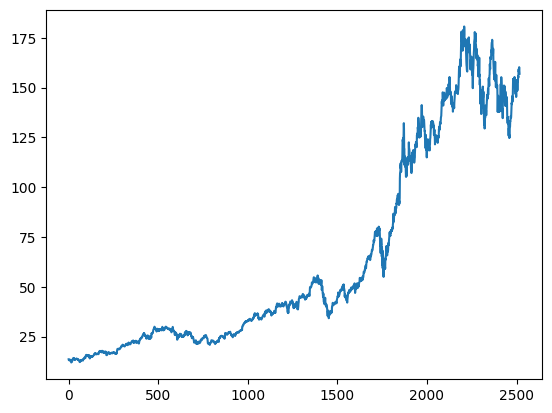

In [4]:
plt.plot(df.Close)

In [5]:
df.shape

(2518, 5)

In [6]:
m100 = df.Close.rolling(100).mean()
m100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    144.200299
2514    144.346201
2515    144.396251
2516    144.450524
2517    144.518212
Name: Close, Length: 2518, dtype: float64

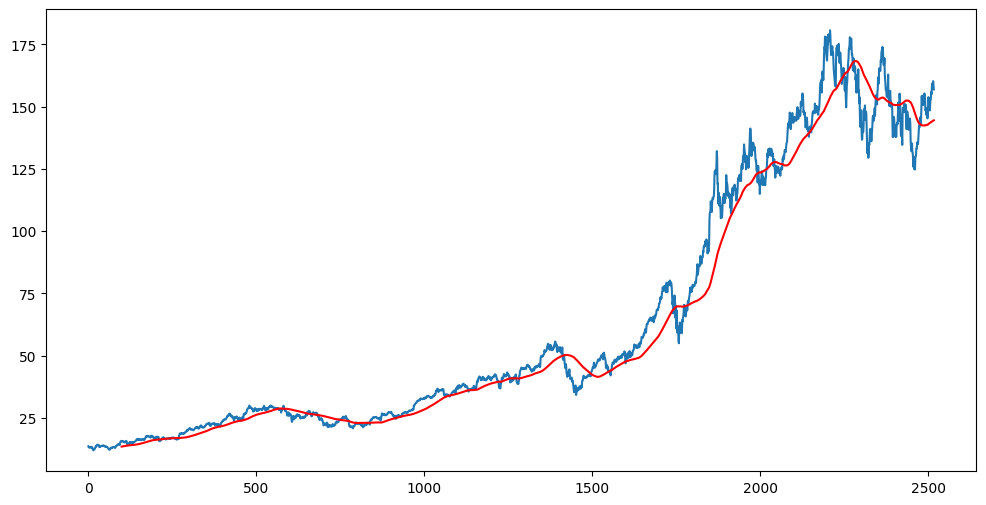

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(m100, 'r')

In [8]:
m200 = df.Close.rolling(200).mean()
m200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    147.450848
2514    147.518131
2515    147.579222
2516    147.634196
2517    147.708949
Name: Close, Length: 2518, dtype: float64

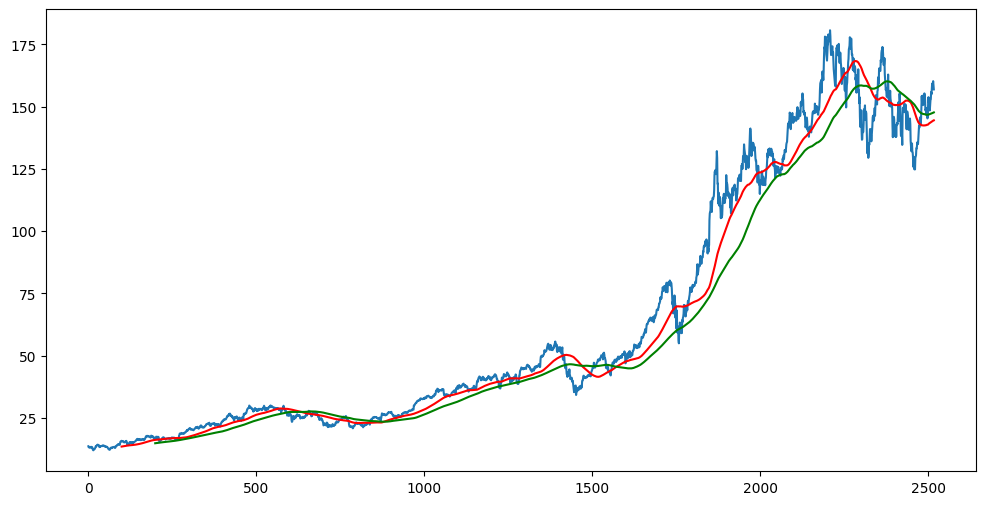

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(m100, 'r')
plt.plot(m200, 'g')

In [10]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)
                         

(1762, 1)
(756, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_arr = scaler.fit_transform(data_train)
data_train_arr

array([[0.02359167],
       [0.01736906],
       [0.01776727],
       ...,
       [0.71113856],
       [0.70624756],
       [0.75271284]])

In [14]:
x_train = []
y_train = [] 

In [15]:
for i in range(100, data_train_arr.shape[0]):
    x_train.append(data_train_arr[i-100: i])
    y_train.append(data_train_arr[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()

model.add(LSTM(units = 50, activation='relu',return_sequences=True, 
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 27s 364ms/step - loss: 0.0310
Epoch 2/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0067
Epoch 3/50
52/52 [==============================] - 19s 357ms/step - loss: 0.0042
Epoch 4/50
52/52 [==============================] - 19s 358ms/step - loss: 0.0048
Epoch 5/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0048
Epoch 6/50
52/52 [==============================] - 19s 373ms/step - loss: 0.0038
Epoch 7/50
52/52 [==============================] - 19s 362ms/step - loss: 0.0044
Epoch 8/50
52/52 [==============================] - 19s 358ms/step - loss: 0.0042
Epoch 9/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0038
Epoch 10/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0035
Epoch 11/50
52/52 [==============================] - 18s 342ms/step - loss: 0.0036
Epoch 12/50
52/52 [==============================] - 17s 333ms/step - loss: 0.0032
Epoch 13/50
5